In [43]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
graph = nx.read_edgelist('./scifi_films_edgelist.txt', data=False, create_using=nx.MultiDiGraph())

In [20]:
nx.number_of_edges(graph), nx.number_of_nodes(graph)

(74114, 26639)

In [102]:
average_degree = 0
for node in nx.nodes(graph):
    average_degree += len(list(nx.all_neighbors(graph, node)))
average_degree = average_degree/len(nx.nodes(graph))
average_degree

5.301775592176884

In [95]:
edge_types = open('./scifi_films_types.txt', 'r')

In [96]:
edge_type_distribution = {}
total = 0
for et in edge_types:
    key = et.strip("\n")
    if key in edge_type_distribution.keys():
        edge_type_distribution[key] += 1
    else:
        edge_type_distribution[key] = 1
    total += 1

In [26]:
edge_type_distribution

{'AFTER_A_WORK_BY': 305,
 'ART_DIRECTOR': 9,
 'ASPECT_RATIO': 509,
 'AUSTRALIAN_CLASSIFICATION': 4,
 'AUTHOR': 21,
 'AWARD_RECEIVED': 357,
 'BASED_ON': 488,
 'BBFC_RATING': 33,
 'CAST_MEMBER': 21347,
 'CHARACTERS': 341,
 'CHOREOGRAPHER': 1,
 'CITES': 2,
 'CLASSIND_RATING': 38,
 'CNC_FILM_RATING_FRANCE': 66,
 'CNC_FILM_RATING_ROMANIA': 120,
 'COLOR': 2518,
 'COMPOSER': 1945,
 'CONTRIBUTORS_TO_THE_CREATIVE_WORK': 8,
 'COPYRIGHT_OWNER': 1,
 'COSTUME_DESIGNER': 121,
 'COUNTRY': 33,
 'COUNTRY_OF_CITIZENSHIP': 1,
 'COUNTRY_OF_ORIGIN': 3828,
 'CREATOR': 16,
 'CREW_MEMBER': 2,
 'DEPICTS': 5,
 'DESCRIBED_BY_SOURCE': 4,
 'DEVELOPER': 1,
 'DIFFERENT_FROM': 57,
 'DIRECTOR': 2980,
 'DIRECTOR_OF_PHOTOGRAPHY': 1526,
 'DISTRIBUTION': 2,
 'DISTRIBUTOR': 1799,
 'EDITION': 6,
 'EDITOR': 2,
 'EIRIN_FILM_RATING': 46,
 'EXECUTIVE_PRODUCER': 401,
 'FABRICATION_METHOD': 13,
 'FACET_OF': 1,
 'FILMING_LOCATION': 1709,
 'FILMIRODA_RATING': 381,
 'FILM_CREW_MEMBER': 384,
 'FILM_EDITOR': 997,
 'FILM_SCRIPT': 3,
 '

In [33]:
df = pd.DataFrame.from_dict({
    'type': list(edge_type_distribution.keys()),
    'count': list(edge_type_distribution.values())})

In [45]:
df_sorted = df.sort_values('count', ascending=False)
df_sorted

,count,type
7,21347,CAST_MEMBER
88,8961,GENRE
103,3828,COUNTRY_OF_ORIGIN
59,3495,INSTANCE_OF
32,3315,ORIGINAL_LANGUAGE_OF_WORK
89,2980,DIRECTOR
10,2953,SCREENWRITER
114,2567,PRODUCER
45,2518,COLOR
25,1945,COMPOSER


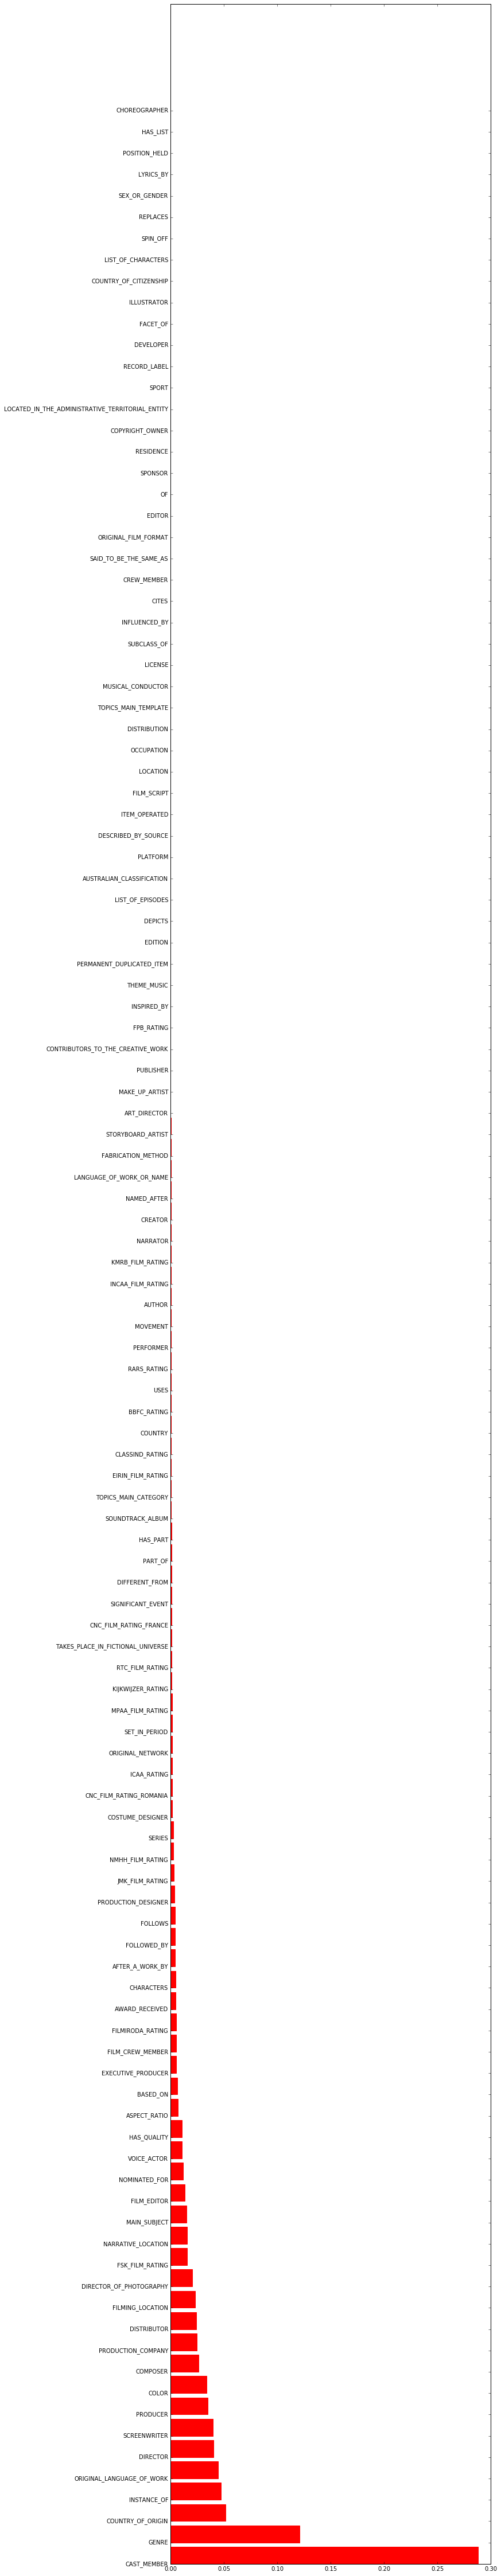

In [98]:
labels = np.arange(len(df_sorted['type']))
plt.figure(figsize=(10, 80))
plt.barh(labels, df_sorted['count'] / total, color="red", edgecolor="red", height=0.8)
plt.yticks(labels, df_sorted['type'], rotation=0)
plt.show()

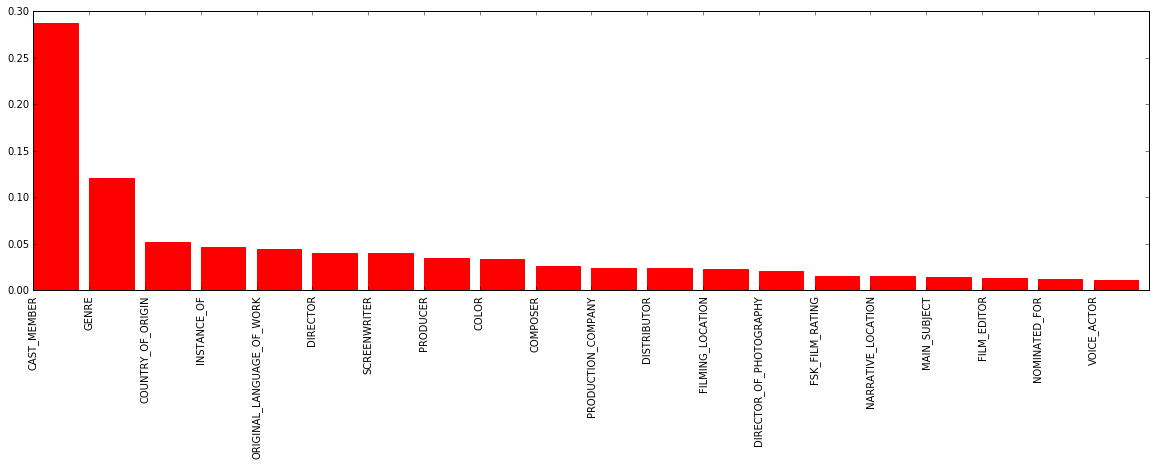

In [97]:
limit = 20
labels = np.arange(len(df_sorted['type'][:limit]))
plt.figure(figsize=(20, 5))
plt.bar(labels, df_sorted['count'][:limit] / total, color="red", edgecolor="red", width=0.8)
plt.xticks(labels, df_sorted['type'][:limit], rotation=90)
plt.show()